<a href="https://colab.research.google.com/github/Touza-Isaac/Prediction-Prix-TV/blob/delete/Prediction_Prix_TV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import des librairies**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


2.**Chargement des données**

In [ ]:
# Chargement des données
data = pd.read_csv('TV_data.csv')

In [ ]:
# visualisation des données
data

,Modele TV,Taille,Poids,Resolution,Prix (FCFA)
0,TV 1,55'',20 kg,2160,800000
1,TV 2,65'',25 kg,4320,1200000
2,TV 3,43'',15 kg,1080,500000
3,TV 4,32'',10 kg,768,250000
4,TV 5,75'',30 kg,2160,1500000
5,TV 6,50'',18 kg,2160,700000
6,TV 7,55'',20 kg,1080,600000
7,TV 8,43'',15 kg,2160,550000
8,TV 9,65'',25 kg,2160,1100000
9,TV 10,32'',10 kg,768,300000


**3. Prétraitement des données**

In [ ]:
# Suppression des lignes avec des valeurs manquantes
data = data.dropna()


In [ ]:
# Supprimer les guillemets autour de la colonne "taille"
data['Taille'] = data['Taille'].str.replace("'", "")

# Supprimer le suffixe "kg" de la colonne "poids"
data['Poids'] = data['Poids'].str.replace(" kg", "").astype(float)

In [ ]:
# suppression de la caractéristique Modele TV
data = data.drop('Modele TV',axis=1)


In [ ]:
data

,Taille,Poids,Resolution,Prix (FCFA)
0,55,20.0,2160,800000
1,65,25.0,4320,1200000
2,43,15.0,1080,500000
3,32,10.0,768,250000
4,75,30.0,2160,1500000
5,50,18.0,2160,700000
6,55,20.0,1080,600000
7,43,15.0,2160,550000
8,65,25.0,2160,1100000
9,32,10.0,768,300000


**4. Subdivision des données en ensembles d'entraînement et de test**

In [ ]:
# separation des variables en variables cibles et non cibles
X = data.drop('Prix (FCFA)', axis=1)
y = data['Prix (FCFA)']
# Subdivision des données en données de test et d'entrainement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Affichage de la taille des données de test et d'entrainement
len(X_train)
len(X_test)

4

**5. Construction des modeles de classification**

In [ ]:
# Construction du modèle de classification (Naïve Bayes)
modelNB = GaussianNB()

In [ ]:

# Construction du modèle de classification (KNN)
modelKNN = KNeighborsClassifier(n_neighbors=5)

**6. Entrainnements des modeles**

In [ ]:
# Entraînement du modèle NB
modelNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Entraînement du modèle KNN
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Prédictions sur l'ensemble de test
# pour NB
y_predNB = modelNB.predict(X_test)
# Pour KNN
y_predKNN = modelKNN.predict(X_test)

**7. Matrices de confusion**

In [ ]:
# Génération de la matrice de confusion pour NB
confusion_matNB = confusion_matrix(y_test, y_predNB)
print("Matrice de confusion :")
print(confusion_matNB)

Matrice de confusion :
[[0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]


In [ ]:
# Génération de la matrice de confusion pour KNN
confusion_matKNN = confusion_matrix(y_test, y_predKNN)
print("Matrice de confusion :")
print(confusion_matKNN)

Matrice de confusion :
[[0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]


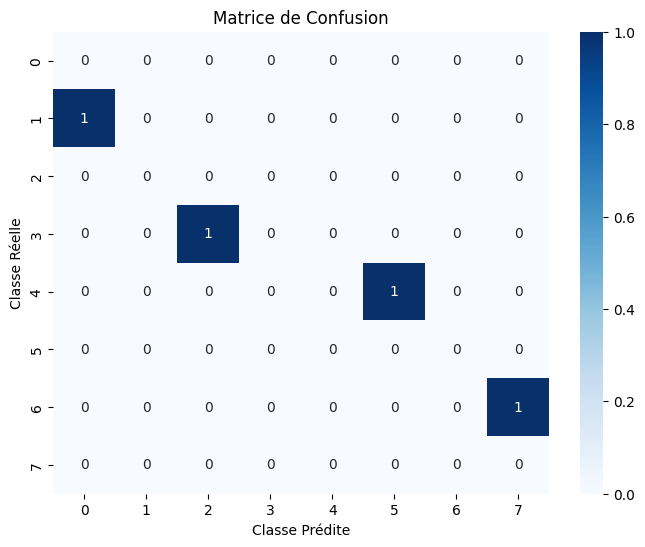

In [75]:
# generation des matrices de confusion sous forme d'images
import matplotlib.pyplot as plt
import seaborn as sns

# Génération de la matrice de confusion
confusion_mat = confusion_matrix(y_test, y_predNB)

# Création du heatmap à partir de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Ajout des labels des axes
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.title('Matrice de Confusion')

# Affichage de la figure
plt.show()


**8. Rapports de classification**

In [ ]:
# Impression des rapports de classification pour NB
classification_repNB = classification_report(y_test, y_predNB)
print("Rapport de classification :")
print(classification_repNB)


Rapport de classification :
              precision    recall  f1-score   support

      500000       0.00      0.00      0.00       0.0
      550000       0.00      0.00      0.00       1.0
      650000       0.00      0.00      0.00       0.0
      700000       0.00      0.00      0.00       1.0
      800000       0.00      0.00      0.00       1.0
      950000       0.00      0.00      0.00       0.0
     1200000       0.00      0.00      0.00       1.0
     1800000       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Impression des rapports de classification pour NB
classification_repKNN = classification_report(y_test, y_predKNN)
print("Rapport de classification :")
print(classification_repKNN)

Rapport de classification :
              precision    recall  f1-score   support

      250000       0.00      0.00      0.00       0.0
      550000       0.00      0.00      0.00       1.0
      700000       0.00      0.00      0.00       1.0
      800000       0.00      0.00      0.00       1.0
     1000000       0.00      0.00      0.00       0.0
     1200000       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [60]:
# Évaluation des performances du modèle
accuracy = modelKNN.score(X_test, y_test)
print("Précision du modèle :", accuracy)

Précision du modèle : 0.0


**9. Prediction des nouveaux prix**

In [74]:
new_data = pd.DataFrame({
    'Modele TV': ['TV 21', 'TV 22', 'TV 23', 'TV 24', 'TV 25'],
    'Taille': ['58\'\'', '70\'\'', '55\'\'', '48\'\'', '82\'\''],
    'Poids': ['22 kg', '27 kg', '18 kg', '16 kg', '35 kg'],
    'Resolution': [3840, 7680, 1920, 1366, 3840]
})

# Prétraitement des nouvelles données
new_data2 = new_data.drop('Modele TV',axis=1)
new_data2['Taille'] = new_data2['Taille'].str.replace("'", "")
new_data2['Poids'] = new_data2['Poids'].str.replace(" kg", "").astype(float)
#new_data['Resolution'] = new_data['Resolution'].astype(float)

# Normalisation de la caractéristique "Taille" des nouvelles données
#new_data['Taille'] = scaler.transform(new_data[['Taille']])

# Prédiction des classes des nouvelles données
predictionsNB = modelNB.predict(new_data2)
predictionsKNN = modelKNN.predict(new_data2)

# Création du tableau des prédictions
prediction_table = pd.DataFrame({
    'Modèle TV': new_data['Modele TV'],
    'Taille': new_data['Taille'],
    'Poids': new_data['Poids'],
    'Resolution': new_data['Resolution'],
    'Prix prédit avec NB': predictionsNB,
    'Prix prédit avec KNN': predictionsKNN
})

# Affichage du tableau des prédictions
prediction_table

,Modèle TV,Taille,Poids,Resolution,Prix prédit avec NB,Prix prédit avec KNN
0,TV 21,58'',22 kg,3840,1800000,900000
1,TV 22,70'',27 kg,7680,1800000,1100000
2,TV 23,55'',18 kg,1920,950000,700000
3,TV 24,48'',16 kg,1366,650000,250000
4,TV 25,82'',35 kg,3840,2200000,1100000


In [67]:
new_data

,Taille,Poids,Resolution
0,58,22.0,3840
1,70,27.0,7680
2,55,18.0,1920
3,48,16.0,1366
4,82,35.0,3840
